Ahora que la división y limpieza de los datos está realizado, empezaremos con la transformación.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importamos librerias
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from statsmodels.stats.outliers_influence import variance_inflation_factor


# **Transformación de los datos**

In [ ]:
# Ruta del archivo en Google Drive
ruta_archivo_drive = '/content/drive/My Drive/Proyecto 7/data/df.pkl'

# Cargar el DataFrame desde el archivo
with open(ruta_archivo_drive, 'rb') as f:
    df = pickle.load(f)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 440
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _golden             439 non-null    bool  
 1   _unit_state         439 non-null    object
 2   _trusted_judgments  439 non-null    int64 
 3   birthplace          439 non-null    object
 4   date_of_birth       439 non-null    object
 5   race_ethnicity      439 non-null    object
 6   religion            439 non-null    object
 7   sexual_orientation  439 non-null    object
 8   year_of_award       439 non-null    int64 
 9   award               439 non-null    object
 10  biourl              439 non-null    object
 11  movie               439 non-null    object
 12  person              439 non-null    object
 13  genre               439 non-null    object
 14  gender              439 non-null    object
 15  region              439 non-null    object
dtypes: bool(1), int64(2), object(13

In [ ]:
# Agrupar las columnas por Categórica y Numérica
Columna_categorica = df.select_dtypes(include =["object", "bool"]).columns
Columna_numerica = df.select_dtypes(include =["float64", "int64"]).columns
print("El total de columnas categoricas son ", len(Columna_categorica))
print("El total de columnas numéricas son ", len(Columna_numerica))

El total de columnas categoricas son  14
El total de columnas numéricas son  2


In [ ]:
# Definir la lista de columnas categóricas
cols_cat2 = ["_golden", "_unit_state", "_last_judgment_at", 'birthplace', 'date_of_birth', 'race_ethnicity', 'religion',
            'sexual_orientation', 'award', 'biourl', 'movie', 'person', "genre", "gender", "region"]

# Iterar sobre las columnas categóricas y verificar si existen en el DataFrame
for col in cols_cat2:
    if col in df.columns:
        print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna _golden: 2 subniveles
Columna _unit_state: 2 subniveles
Columna birthplace: 232 subniveles
Columna date_of_birth: 345 subniveles
Columna race_ethnicity: 6 subniveles
Columna religion: 21 subniveles
Columna sexual_orientation: 5 subniveles
Columna award: 5 subniveles
Columna biourl: 347 subniveles
Columna movie: 334 subniveles
Columna person: 347 subniveles
Columna genre: 12 subniveles
Columna gender: 2 subniveles
Columna region: 6 subniveles


**Observación:**
Todos los datos categóricos presentan más de una variable. Esto significa que habrá que aplicar alguna técnica se simplificación de variables para poder avanzar con el entrenamiento del modelo predictivo.

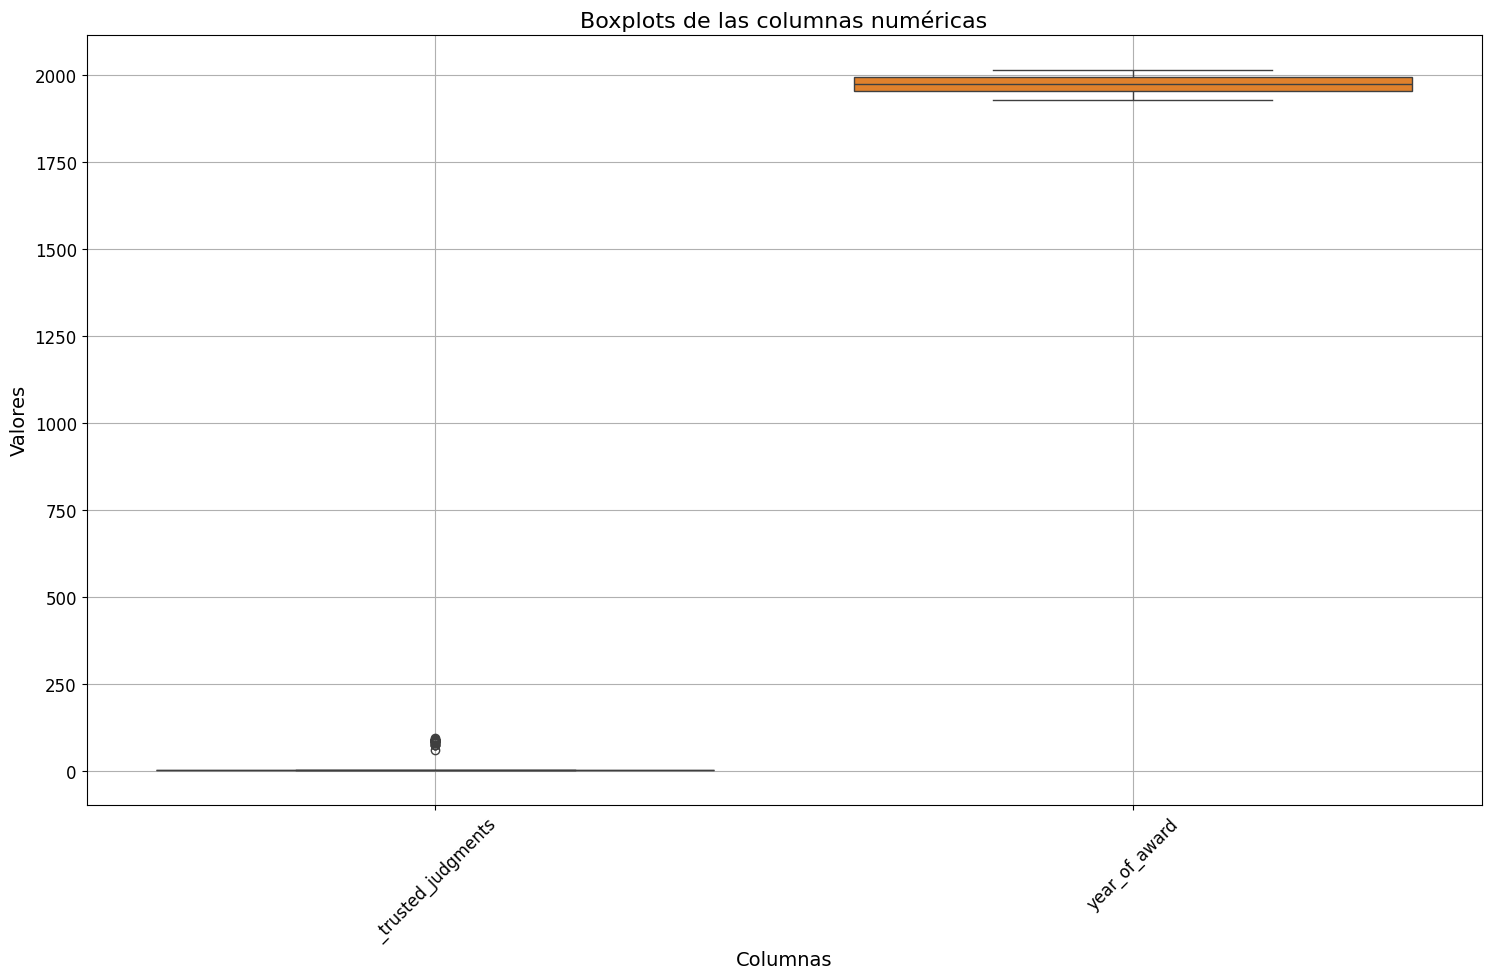

In [ ]:
# Generar gráfica de los valores numéricos para identificar outlier
plt.figure(figsize=(18, 10))  # Tamaño de la figura más grande
sns.boxplot(data=df.select_dtypes(include="int64"))  # Asegurar que solo se incluyan columnas numéricas
plt.xticks(rotation=45, fontsize=12)  # Rotar y aumentar el tamaño de las etiquetas del eje x
plt.yticks(fontsize=12)  # Aumentar el tamaño de las etiquetas del eje y
plt.title('Boxplots de las columnas numéricas', fontsize=16)  # Título más grande y claro
plt.xlabel('Columnas', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Valores', fontsize=14)  # Etiqueta del eje y
plt.grid(True)  # Agregar cuadrículas
plt.show()


**Observación:**
La columna "_trusted_judgments" presenta datos atícos.
Estos datos serán analizados para entender el contexto.

Entrenamiento del Modelo DBSCAN para la detección de outlier

In [ ]:
# Extraer la columna relevante
X = df[['_trusted_judgments']]

# Definir el modelo DBSCAN
# eps es el radio de la vecindad, min_samples es el número mínimo de puntos en una vecindad para ser considerados core points
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Entrenar el modelo y predecir clusters
clusters = dbscan.fit_predict(X)

In [ ]:
# Identificar outliers
outliers = X[clusters == -1]

print("Outliers identificados:")
print(outliers)

Outliers identificados:
     _trusted_judgments
21                   82
33                   87
52                   75
82                   81
111                  95
152                  84
179                  90
205                  84
235                  62
263                  76
280                  75
289                  86
293                  89
328                  85
347                  76
377                  87
401                  87
407                  92
411                  86
430                  86


Como se explicó en el *Resumen Ejecutivo*, la columna _trusted_judgments representa el número de juicios confiables otorgados a la unidad de datos por los anotadores. Y complementado con el análisis realizado en el notebook *Integración y Limpieza*, el 94% de la data es considerada como data no confiable (puntaje 3) y el resto de la información obtuvo una calificación mucho más alta y es considerada confiable. Esta puntuación es la que está siendo considerada como outlier.

Dicho esto, se procede a **no eliminar datos outlier** por considerarse cruciales en nuestro análisis.


In [ ]:
# Se genera un df con las columnas que son categóricas
df_categorica = df[Columna_categorica]
df_categorica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 440
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _golden             439 non-null    bool  
 1   _unit_state         439 non-null    object
 2   birthplace          439 non-null    object
 3   date_of_birth       439 non-null    object
 4   race_ethnicity      439 non-null    object
 5   religion            439 non-null    object
 6   sexual_orientation  439 non-null    object
 7   award               439 non-null    object
 8   biourl              439 non-null    object
 9   movie               439 non-null    object
 10  person              439 non-null    object
 11  genre               439 non-null    object
 12  gender              439 non-null    object
 13  region              439 non-null    object
dtypes: bool(1), object(13)
memory usage: 48.4+ KB


**Observación:**
Se decide eliminar las columnas "biourl", "movie", "birthplace" y "person" ya que no son relevantes para el análisis que estamos realizando.
Estas características no se utilizarán como variables predictoras en el modelo y no son de interés para el análisis.

In [ ]:
df_categorica = df_categorica.drop(columns=['biourl', 'movie', "birthplace", 'person'])

In [ ]:
# Se decide eliminar la columna "date_of_birth", ya que contiene información que parece tener errores.
df_categorica = df_categorica.drop(columns=["date_of_birth"])

**Transformación de los datos**

Se convertirán las columnas categóricas en variables numéricas usando la técnica de Embedding. El embedding sirve para representar datos categóricos en un espacio de características continuas de menor dimensión.

In [ ]:
# Hacer una copia del DataFrame original
df_copy = df.copy()

# Seleccionar columnas que no sean 'object' ni 'bool'
df_copy = df_copy.select_dtypes(exclude=['object', 'bool'])



In [ ]:
# Obtener una copia del DataFrame
df_encoded = df_categorica.copy()

# Definir el tamaño del embedding (aunque no se utiliza en este ejemplo)
embedding_dim = 10

# Crear embeddings para cada columna categórica
category_embedding = {}

for column in df_encoded.select_dtypes(include=['object', "bool"]).columns:
    unique_categories = df_encoded[column].unique()
    category_embedding[column] = dict(zip(unique_categories, range(1, len(unique_categories) + 1)))  # Asignar un número único a cada categoría
    df_encoded[column] = df_encoded[column].map(category_embedding[column]).fillna(0)  # Llenar los valores NaN con 0

# Mostrar el DataFrame transformado
print("DataFrame transformado:")
print(df_encoded)

# Imprimir el diccionario de mapeo
print("\nDiccionario de mapeo:")
print(category_embedding)

DataFrame transformado:
     _golden  _unit_state  race_ethnicity  religion  sexual_orientation  \
0          1            1               1         1                   1   
1          1            1               1         2                   1   
2          1            1               1         3                   1   
3          1            1               1         4                   1   
4          1            1               1         1                   1   
..       ...          ...             ...       ...                 ...   
436        1            1               1         2                   1   
437        1            1               1         1                   1   
438        1            1               1        13                   1   
439        1            1               1        14                   1   
440        1            1               1        15                   1   

     award  genre  gender  region  
0        1      1       1       1  
1  

In [ ]:
# Mostrar tipos de datos del DataFrame
print(df_encoded.dtypes)

_golden               int64
_unit_state           int64
race_ethnicity        int64
religion              int64
sexual_orientation    int64
award                 int64
genre                 int64
gender                int64
region                int64
dtype: object


Revisemos que significan algunos diccionarios.

In [ ]:
genre_mapping = category_embedding["genre"]  # 'category_embedding' es el diccionario que contiene el mapeo
print(genre_mapping)

{'Comedia': 1, 'Drama': 2, 'Bélica': 3, 'Crimen': 4, 'Musical': 5, 'Aventura': 6, 'Biografía': 7, 'Thriller': 8, 'Western': 9, 'Romance': 10, 'Epica': 11, 'Suspenso': 12}


In [ ]:
award_mapping = category_embedding["award"]  # 'category_embedding' es el diccionario que contiene el mapeo
print(award_mapping)

{'Best Director': 1, 'Best Actor': 2, 'Best Supporting Actor': 3, 'Best Actress': 4, 'Best Supporting Actress': 5}


In [ ]:
# Para finalizar con la transformación de los datos, se concatenan los df: df_encoded con df_copy
df_concatenado = pd.concat([df_encoded, df_copy], axis=1)

df_concatenado.info()


<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 440
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   _golden             439 non-null    int64
 1   _unit_state         439 non-null    int64
 2   race_ethnicity      439 non-null    int64
 3   religion            439 non-null    int64
 4   sexual_orientation  439 non-null    int64
 5   award               439 non-null    int64
 6   genre               439 non-null    int64
 7   gender              439 non-null    int64
 8   region              439 non-null    int64
 9   _trusted_judgments  439 non-null    int64
 10  year_of_award       439 non-null    int64
dtypes: int64(11)
memory usage: 41.2 KB


In [ ]:
df_concatenado.describe() # Ahora que todos los datos son numéricos, podemos ver data estadística.

,_golden,_unit_state,race_ethnicity,religion,sexual_orientation,award,genre,gender,region,_trusted_judgments,year_of_award
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,1.056948,1.056948,1.177677,8.031891,1.118451,2.988610,3.002278,1.378132,1.806378,7.658314,1972.990888
std,0.232007,0.232007,0.699219,6.418003,0.482196,1.423019,2.233513,0.485474,0.642025,19.056318,23.945141
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1927.000000
25%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1953.000000
50%,1.000000,1.000000,1.000000,6.000000,1.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1973.000000
75%,1.000000,1.000000,1.000000,13.000000,1.000000,4.000000,4.000000,2.000000,2.000000,3.000000,1994.000000
max,2.000000,2.000000,6.000000,21.000000,5.000000,5.000000,12.000000,2.000000,6.000000,95.000000,2014.000000


In [ ]:
# Analizamos mapa de correlación
corr = df_concatenado.corr()
corr.style.background_gradient()

,_golden,_unit_state,race_ethnicity,religion,sexual_orientation,award,genre,gender,region,_trusted_judgments,year_of_award
_golden,1.000000,1.000000,-0.020293,0.020244,-0.040026,0.084953,-0.031092,0.051622,-0.002444,0.995899,0.045711
_unit_state,1.000000,1.000000,-0.020293,0.020244,-0.040026,0.084953,-0.031092,0.051622,-0.002444,0.995899,0.045711
race_ethnicity,-0.020293,-0.020293,1.000000,0.034348,-0.001620,0.077759,0.008512,-0.003325,0.117495,-0.019593,0.192368
religion,0.020244,0.020244,0.034348,1.000000,-0.093441,0.118033,0.098425,0.035690,0.012584,0.011532,-0.006327
sexual_orientation,-0.040026,-0.040026,-0.001620,-0.093441,1.000000,-0.017993,0.001869,0.013041,0.000504,-0.039315,-0.032137
award,0.084953,0.084953,0.077759,0.118033,-0.017993,1.000000,-0.090502,0.806017,0.097540,0.089017,0.057486
genre,-0.031092,-0.031092,0.008512,0.098425,0.001869,-0.090502,1.000000,-0.137659,0.046481,-0.027446,0.150438
gender,0.051622,0.051622,-0.003325,0.035690,0.013041,0.806017,-0.137659,1.000000,0.081610,0.053730,-0.005399
region,-0.002444,-0.002444,0.117495,0.012584,0.000504,0.097540,0.046481,0.081610,1.000000,-0.004487,0.086912
_trusted_judgments,0.995899,0.995899,-0.019593,0.011532,-0.039315,0.089017,-0.027446,0.053730,-0.004487,1.000000,0.046075


**Observación:**
Hay tres variables que evalúan la confiabilidad de la data y que, según el mapa de correlación, existe una fuerte relacion entre ellas.

Las columnas son:
- _trusted_judgments: Número de juicios confiables otorgados a la unidad de datos por los anotadores.

- _golden: Indica si la fila es una instancia verdadera o falsa. Es decir, una instancia de referencia confiable o no confiable que puede ser utilizada para evaluar la calidad del trabajo de los anotadores.

- _unit_state: Estado de la unidad de datos, puede ser "golden", "finalized", etc.

A pesar de su gran correlación, nuestro análisis seguirá la correlación que existe entre **género y premio**.


In [ ]:
# Ruta en la que deseas guardar el archivo en tu Google Drive
file_path = '/content/drive/My Drive/Proyecto 7/data/df_concatenado.pkl'

# Guardar el DataFrame en un archivo pickle en Google Drive
with open(file_path, 'wb') as f:
    pickle.dump(df_concatenado, f)